<a href="https://colab.research.google.com/github/danstam/computer_vision_cnn/blob/main/my_first_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First CNN

Welcome to this notebook documenting my journey of building my very first Convolutional Neural Network (CNN). This step-by-step guide will walk you through the process, from data preparation to model construction, training, and documentation.

In [2]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

# Import PyTorch: We import the main PyTorch library and the nn module, which provides classes for building neural networks.

# Import torchvision: We import the torchvision library, which is built on top of PyTorch and provides a collection of datasets and pre-trained models for computer vision tasks. We also import the datasets module to access pre-defined datasets, and the ToTensor transform to convert images to tensors.

# Import matplotlib for visualization: We import the matplotlib.pyplot module to visualize the data and results.

# Check versions: We print the versions of PyTorch and torchvision to ensure we have the correct versions installed.


PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Getting a dataset

The dataset we'll be using is [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) made by Zalando Research.

FashionMNIST is a popular dataset that serves as a fantastic starting point for exploring computer vision algorithms. It consists of 60,000 grayscale images belonging to ten different fashion categories, including t-shirts, dresses, sneakers, and more. Each image is a 28x28 pixel representation of a fashion item. This dataset is already split into training and testing sets.

For more information on using datasets in PyTorch, you can refer to the [Datasets & Dataloader ](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) part of the Pytorch documentation.


In [4]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",        # Directory to download the FashionMNIST training data to
    train=True,         # Fetch the training data
    download=True,      # Download the data if it doesn't already exist on disk
    transform=ToTensor(),   # Transform the images from PIL format to Torch tensors
    target_transform=None  # No transformation needed for the labels
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None  # No transformation needed for the labels
)


100%|██████████| 26421880/26421880 [00:02<00:00, 11116188.58it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170107.27it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3280442.82it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18841428.44it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
# See first training sample in Tensor format
image, label = train_data[0]


print(image, label)
print(f"Image shape: {image.shape} -> [color_channels, height, width]")  # Print the shape of the image to check for shape errors and ensure consistency


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

The variable *image* contains the tensor representation of the image. It represents a grayscale image as a 3-dimensional tensor with the shape [color_channels, height, width]. Since FashionMNIST dataset consists of grayscale images, the color_channels value is 1.

The *label* variable represents the corresponding label or class of the image. It indicates the category of the fashion item depicted in the image. In this case, the label is 9 which is ankle boot

## The Significance of Data Exploration and Visualization

Data exploration and visualization are fundamental steps in the data analysis process. They allow us to gain valuable insights, understand the characteristics of the dataset, and make informed decisions based on our findings.

By engaging in data exploration and visualization, we can:

- **Uncover Patterns and Trends**: Visualizing data helps us detect patterns, trends, and relationships that may not be apparent from raw numbers or statistics alone. By visualizing the data, we can gain a deeper understanding of its underlying structure and identify valuable insights.

- **Identify Anomalies and Outliers**: Visualization enables us to spot anomalies, outliers, or unexpected behavior in the data. By visually examining the data, we can quickly identify unusual data points that may require further investigation or indicate data quality issues.







FashionMNIST Dataset Overview:
-----------------------------
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Class names:
  Class 0: T-shirt/top
  Class 1: Trouser
  Class 2: Pullover
  Class 3: Dress
  Class 4: Coat
  Class 5: Sandal
  Class 6: Shirt
  Class 7: Sneaker
  Class 8: Bag
  Class 9: Ankle boot

Randomly Generated Sample Image From Training Data:
-------------------------
Image shape: torch.Size([1, 28, 28])
Label: Sandal


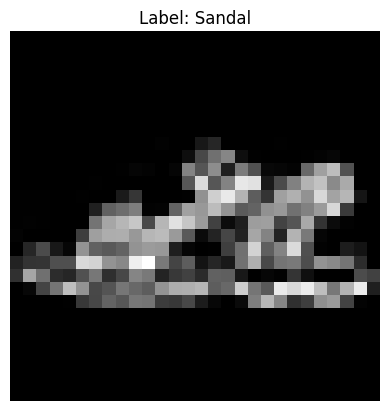

In [6]:
# Dataset Overview and visualization

import random
import matplotlib.pyplot as plt

# Length of the training and testing datasets
train_length = len(train_data)
test_length = len(test_data)

# Class names for FashionMNIST dataset
class_names = train_data.classes

# Number of classes in the dataset
num_classes = len(class_names)

# Printing the dataset overview
print("FashionMNIST Dataset Overview:")
print("-----------------------------")
print(f"Number of training samples: {train_length}")
print(f"Number of testing samples: {test_length}")
print(f"Number of classes: {num_classes}")
print("Class names:")
for i, class_name in enumerate(class_names):
    print(f"  Class {i}: {class_name}")

# Randomly selecting a training sample
random_index = random.randint(0, train_length - 1)
image, label = train_data[random_index]

# Printing a line before the randomly generated image
print("\nRandomly Generated Sample Image From Training Data:")
print("-------------------------")

# Printing the randomly generated image and its size
print(f"Image shape: {image.shape}")
print(f"Label: {class_names[label]}")

# Displaying the random training sample

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {class_names[label]}")
plt.axis('off')
plt.show()


# Lets view a few more

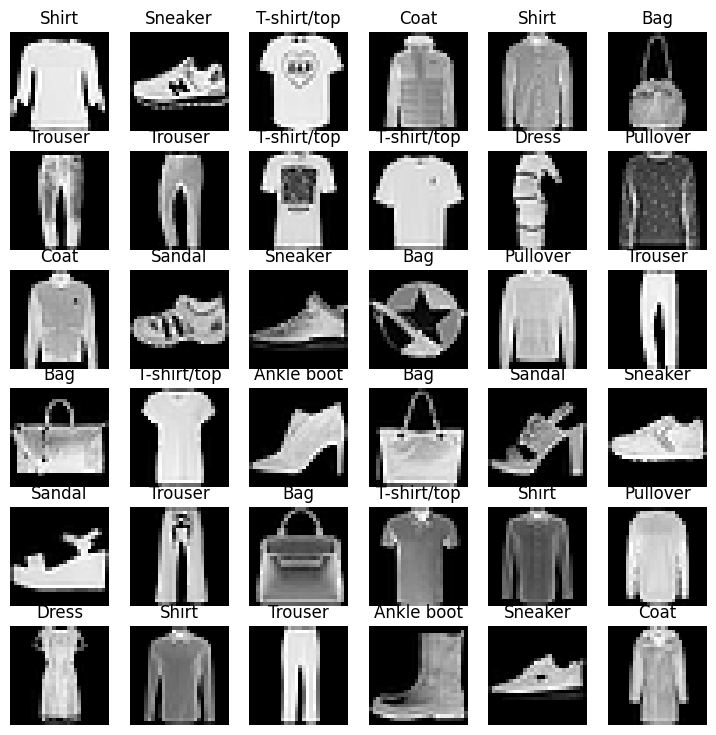

In [7]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 6, 6
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## Turning Data into Iterables (batches)

In PyTorch, we often work with large datasets that cannot be loaded entirely into memory at once. To efficiently handle such datasets, we convert them into iterable objects (batches)
 using PyTorch's `DataLoader` class.

Iterables are objects that can be looped over, allowing us to access the data batch by batch. The `DataLoader` class provides an easy way to create iterable datasets by specifying the batch size, shuffling the data, and applying various data transformations.

By converting the data into iterables, we can:

- **Efficiently load large datasets**: Iterables allow us to load and process data in smaller batches, reducing memory usage and enabling the handling of large datasets that do not fit entirely into memory.

- **Enable parallel processing**: PyTorch's `DataLoader` supports multi-threaded data loading, allowing us to take advantage of parallel processing capabilities to speed up training and inference.

- **Apply data transformations**: We can easily apply various data transformations, such as resizing, normalizing, or augmenting the data, within the `DataLoader`, ensuring consistent and efficient preprocessing.

- **Enable random shuffling**: `DataLoader` can shuffle the data during training, which is crucial for preventing the model from learning the order or any specific biases present in the dataset.

To convert our dataset into an iterable, we create a `DataLoader` object, passing in the dataset and specifying the desired batch size, shuffling, and other relevant parameters.



In [8]:
from torch.utils.data import DataLoader

# Set the desired batch size
BATCH_SIZE = 32

# Turn datasets into iterables (batches)

# Create a train dataloader
train_dataloader = DataLoader(train_data,  # Dataset to turn into an iterable
                              batch_size=BATCH_SIZE,  # How many samples per batch
                              shuffle=True  # Shuffle the data every epoch
                              )

# Create a test dataloader
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False  # Don't necessarily have to shuffle the testing data
                             )

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b7b5cc15c60>, <torch.utils.data.dataloader.DataLoader object at 0x7b7b5cc172e0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [9]:
# Fetch the next batch of data from the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# Display the shapes of the input features and output labels tensors
print(train_features_batch.shape, train_labels_batch.shape)

# Print a human-readable explanation of the dimensions of the data
print(f"In other words: 32 batches of 28 by 28 by 1")

# train_features_batch.shape represents the shape of the input features tensor in the current batch.
# train_labels_batch.shape represents the shape of the corresponding output labels tensor in the batch.




torch.Size([32, 1, 28, 28]) torch.Size([32])
In other words: 32 batches of 28 by 28 by 1


## Flattening the Input: Preserving Information and Enabling Compatibility

Before diving into the intricacies of building our first model, it is essential to understand the significance of flattening the input layer. In the case of an input with the shape [color_channels, height, width], we need to transform it into a one-dimensional vector.

The purpose of flattening the input is twofold: preserving information and enabling compatibility. Let's explore these reasons in more detail:

1. Preserving Information: By flattening the input layer, we ensure that every individual element within the input retains its significance. Each pixel, represented by its color channels (e.g., red, green, and blue), height, and width, contributes valuable information to the overall understanding of the data. Flattening maintains the integrity of this information, ensuring that it is not lost or distorted during the transformation process.

2. Enabling Compatibility: Many machine learning algorithms and models require the input to be in a specific format or shape. Flattening the input layer allows us to convert the multidimensional structure into a one-dimensional vector, which is compatible with a wide range of models. This compatibility ensures that we can seamlessly integrate the input data into various machine learning architectures, such as fully connected neural networks.






In [10]:
# Creat a flattened input layer
flat_layer = nn.Flatten()

X = train_features_batch[0]

output= flat_layer(X)

print(f"Shape before flattening: {X.shape}")
print(f"Shape after flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


# Creating the base model class

In [11]:
#Insatiaing the base model class
from torch import nn

class FashionMNISTModel1V0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        # Create a sequential stack of layers
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # Flatten the input
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # Fully connected layer from input to hidden units
            nn.Linear(in_features=hidden_units, out_features=output_shape)  # Fully connected layer from hidden units to output
        )

    def forward(self, X):
        # Perform forward pass through the layer stack
        return self.layer_stack(X)




## Instantiate the Baseline Model

Now that we have our baseline model class defined, let's proceed to instantiate an actual model object based on that class.

To create an instance of the baseline model, we'll use the following parameters:

- `input_shape`: 784 - This parameter specifies the number of features in the input. In our case, each image in the FashionMNIST dataset has dimensions of 28 pixels by 28 pixels, resulting in a total of 784 features. (The output of flat_layer(X)

- `hidden_units`: 10 - This parameter determines the number of units or neurons in the hidden layer(s) of the model. In our baseline model, we'll start with 10 hidden units to keep it simple and lightweight.

- `output_shape`: len(class_names) - Since FashionMNIST is a multi-class classification problem, we need to define the number of output units in the model. Here, we set the `output_shape` to the length of the `class_names` list, which represents the number of different classes in the FashionMNIST dataset.

By instantiating the baseline model with these parameters, we'll have a fully initialized model ready for training and making predictions on the FashionMNIST dataset.

Feel free to modify or customize these parameters as needed for your specific use case.



In [12]:
# Set the random seed for reproducibility
torch.manual_seed(86)

# Instantiate the baseline model
model_origin = FashionMNISTModel1V0(input_shape=784, # 28*28
                                    hidden_units=10, # number of units in hidden layer
                                    output_shape=len(class_names)) # One for every class

# Move the model to the CPU device
model_origin.to("cpu")


FashionMNISTModel1V0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setup Loss Function and Optimizer

To train our baseline model effectively, we need to set up the loss function and optimizer. Let's go through each step:

### Loss Function

The loss function measures how well the model is performing by quantifying the difference between predicted and target values. Since we're working with a multi-class classification problem, the appropriate loss function to use is `nn.CrossEntropyLoss()`. This loss function calculates the loss between the predicted class probabilities and the true labels, taking into account the logarithmic loss for each class.

### Optimizer

The optimizer determines how the model's weights are updated during the training process to minimize the loss. For our baseline model, we'll use the stochastic gradient descent (SGD) optimizer. The `torch.optim.SGD()` optimizer updates the model's parameters by computing gradients based on a small batch of training data at a time and adjusting the weights accordingly.

In addition to the optimizer, we need to specify the learning rate, which controls the step size taken during weight updates. The learning rate is a hyperparameter that determines the trade-off between convergence speed and overshooting. If the learning rate is too high, the optimizer may miss the optimal solution, while if it is too low, the training process may be slow or get stuck in a suboptimal solution.

### Evaluation Metric

Evaluation metrics help assess the model's performance on validation and test sets. Since we're working on a classification problem, it's common to use accuracy as the evaluation metric. Accuracy measures the proportion of correctly predicted labels out of the total number of samples.





In [13]:
# Setup loss function
loss_fn = nn.CrossEntropyLoss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_origin.parameters(),
                            lr=0.1)

# Define and setup accuracy metric
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculaates where two tensors are equal
  acc = (correct / len(y_pred))*100
  return acc

## Using `torch.device` in PyTorch

When working with PyTorch, it is essential to specify the device (CPU or GPU) on which the tensors and models will be processed. The `torch.device` class allows you to manage the device placement easily.

### Why is it necessary?

1. **Hardware Acceleration**: PyTorch provides GPU acceleration, which significantly speeds up computation for deep learning models. By utilizing GPUs, you can train models faster and handle larger datasets.

2. **Tensor Placement**: PyTorch tensors need to be allocated on the appropriate device. If you have a GPU available, you can transfer tensors to the GPU for faster computation.

### Using `torch.device`

The `torch.device` class is used to specify the device for PyTorch operations. Here's how you can use it:

```python
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example usage: Creating a tensor on the selected device
x = torch.tensor([1, 2, 3]).to(device)


## Comparing Training Time on Different Devices

When working with deep learning models, it is essential to compare the training time on different devices to assess the impact of hardware acceleration. By measuring the time it takes to train a model on CPUs and GPUs, you can evaluate the speed improvements achieved through hardware acceleration.



In [14]:
from timeit import default_timer as timer
import torch

def print_train_time(start: float, end: float, device: torch.device = None):
    """
    Prints the training time and returns the total time elapsed.

    Args:
        start (float): Start time of the training.
        end (float): End time of the training.
        device (torch.device, optional): The device used for training. Defaults to None.

    Returns:
        float: Total time elapsed during training.
    """

    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


## Creating a Training Loop and Training a Model on Batches of Data

In deep learning, training a model typically involves iterating over the dataset in batches and updating the model's parameters using an optimization algorithm. This process is often performed within a training loop that runs for multiple epochs. Here's a step-by-step guide on how to create a training loop and train a model on batches of data:

1. **Loop through Epochs**: Start by looping over the desired number of epochs. An epoch represents a complete iteration over the entire dataset.

2. **Loop through Training Batches**: Within each epoch, loop through the training data in batches. For each batch, perform the necessary training steps, such as forward and backward passes, parameter updates, and calculation of the training loss per batch.

3. **Loop through Testing Batches**: To evaluate the model's performance, loop through the testing data in batches. For each testing batch, perform the required testing steps, such as forward passes and calculation of the testing loss per batch.

4. **Print Progress**: To monitor the training process, print relevant information at key points in the training loop. This may include epoch number, batch number, training and testing losses, and any other metrics of interest.

5. **Timing Measurements**: To measure the training time, record the start and end times of the training process using timing functions such as `timeit.default_timer()`. This will allow you to assess the time it takes to train the model.



In [15]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(86)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create a training and testing loop
for epoch in tqdm(range(epochs)):
    # Print the current epoch number
    print(f"Epoch: {epoch}\n-------")

    ### Training Phase ###
    train_loss = 0
    # Iterate through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_origin.train()  # Set the model to training mode

        # 1. Forward pass
        y_pred = model_origin(X)  # Perform a forward pass to generate predictions

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)  # Compute the loss between predictions and actual labels
        train_loss += loss  # Accumulate the loss per batch

        # 3. Zero the gradients and perform backpropagation
        optimizer.zero_grad()  # Reset the gradients of the optimizer
        loss.backward()  # Backpropagate the loss to compute gradients

        # 4. Perform an optimization step
        optimizer.step()  # Update the model's parameters based on the computed gradients

        # Print the progress by indicating the number of processed samples
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Calculate the average training loss per epoch
    train_loss /= len(train_dataloader)

    ### Testing Phase ###
    test_loss, test_acc = 0, 0
    model_origin.eval()  # Set the model to evaluation mode
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_origin(X)  # Generate predictions for test data

            # 2. Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y)  # Accumulate the loss per batch

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))  # Accumulate accuracy

        # Calculate the average test loss per batch
        test_loss /= len(test_dataloader)

        # Calculate the average test accuracy per batch
        test_acc /= len(test_dataloader)

    # Print the training and testing results for the epoch
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate the total training time
train_time_end_on_cpu = timer()
total_train_time_model_origin = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_origin.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.58698 | Test loss: 0.53948, Test acc: 81.03%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47522 | Test loss: 0.54070, Test acc: 81.97%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45283 | Test loss: 0.52476, Test acc: 81.41%

Train time on cpu: 28.223 seconds


# Make predictions and get model_origin results


In [16]:
torch.manual_seed(86)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of the model.
        accuracy_fn: An accuracy function to compare the model's predictions to the ground truth labels.
        device (torch.device): The device to use for computations (default: "cuda" if available, else "cpu").

    Returns:
        dict: Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.to(device)  # Move the model to the specified device
    model.eval()  # Set the model to evaluation mode
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # For accuracy, we need the predicted labels

        # Scale the loss and accuracy to find the average loss and accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,  # Get the model's class name (works when model was created with a class)
        "model_loss": loss.item(),  # Get the loss value as a scalar
        "model_acc": float(acc)  # Convert acc to float
    }

# Calculate model_origin's results on the test dataset
model_origin_results = eval_model(
    model=model_origin,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_origin_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel1V0',
 'model_loss': 0.5247597694396973,
 'model_acc': 81.40974440894568}

## Making Predictions and Getting Model Results

To make predictions using a trained model and obtain the corresponding model results, you can follow these steps:

1. **Set the Random Seed**: Set the random seed using `torch.manual_seed()` to ensure reproducibility of results.

2. **Define the Evaluation Function**: Create a function called `eval_model` that takes in the trained `model`, `data_loader`, `loss_fn`, and `accuracy_fn` as arguments. This function will be responsible for making predictions on the `data_loader` and calculating the desired evaluation metrics.

3. **Set the Model to Evaluation Mode**: Before making predictions, set the model to evaluation mode using `model.eval()`. This disables operations like dropout or batch normalization that behave differently during training.

4. **Iterate over the Data Loader**: Use a loop to iterate over the `data_loader`. Each iteration provides a batch of input data (`X`) and corresponding labels (`y`).

5. **Perform Forward Pass and Prediction**: Within the loop, perform a forward pass through the model to obtain predictions. Pass the input data to the model using `y_pred = model(X)`.

6. **Calculate Evaluation Metrics**: Using the predicted values (`y_pred`) and ground truth labels (`y`), calculate the desired evaluation metrics. This could include metrics like loss, accuracy, precision, recall, or any other relevant metric. Compute the loss using `loss_fn(y_pred, y)` and the accuracy using `accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))`.

7. **Accumulate Metrics**: Accumulate the calculated metric values across batches. This could involve summing the loss values or averaging accuracy values.

8. **Normalize Metrics**: Normalize the accumulated metric values by dividing them by the total number of batches. This provides an average metric value per batch.

9. **Return the Results**: Return the computed metrics as a dictionary or any other desired data structure. This allows easy access to the model's evaluation results.

10. **Call the Evaluation Function**: Call the `eval_model` function, passing in the trained `model`, testing `data_loader`, `loss_fn`, and `accuracy_fn`.

11. **Access the Model Results**: Store the returned evaluation results in a variable, such as `model_origin_results`. This variable will contain the model's predictions, as well as the computed evaluation metrics, such as loss and accuracy.

By following these steps, you can make predictions using the trained model on the testing data and obtain the desired model results.

```python
torch.manual_seed(86)

def eval_model(model, data_loader, loss_fn, accuracy_fn):
    # Code implementation of the eval_model function as described above...

model_origin_results = eval_model(model_origin, test_dataloader, loss_fn, accuracy_fn)


## Understanding Linear and Nonlinear Functions in Model Building

In machine learning and neural networks, the terms "linear" and "nonlinear" refer to the type of relationship or mapping between the input and output variables. Understanding these concepts is crucial for building more sophisticated and expressive models. Let's explore what linear and nonlinear functions mean:

### Linear Functions

A linear function represents a straight-line relationship between the input and output variables. Mathematically, a linear function can be written as:

    y = mx + c

Here, `y` represents the output variable, `x` represents the input variable, `m` represents the slope or weight, and `c` represents the intercept or bias. The key characteristic of a linear function is that the output variable varies linearly with the input variable.

Linear functions have limited expressive power and may not be suitable for capturing complex patterns in data. However, they provide a foundation for building models and understanding basic relationships between variables.

### Nonlinear Functions

Nonlinear functions represent more complex relationships between the input and output variables. Unlike linear functions, nonlinear functions do not follow a straight-line relationship. Instead, they can have various shapes and curves.

Nonlinear functions introduce additional flexibility and can capture more intricate patterns in data. They can model relationships where the change in the input does not correspond to a constant change in the output. Nonlinear functions can exhibit behaviors such as curves, bends, twists, and oscillations.

In the context of neural networks, introducing nonlinearity is essential for building more powerful models. Nonlinear activation functions, such as ReLU (Rectified Linear Unit), sigmoid, or tanh, are used to introduce nonlinearity between the layers of a neural network. These activation functions allow the model to learn and represent more complex relationships within the data.

### Upgrading the Model with Nonlinearity

In the next part, we will upgrade the model we have built to incorporate nonlinearity. By adding nonlinear activation functions after linear layers, we can introduce more flexibility and capture complex patterns in the data.




In [37]:
# Create a model with non-linear and linear layers
class FashionMNISTModel1V1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # Flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),  # Apply the ReLU activation function
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, X: torch.Tensor):
        return self.layer_stack(X)


## ReLU (Rectified Linear Unit) Activation Function

The ReLU (Rectified Linear Unit) activation function is a popular choice in neural networks for introducing nonlinearity. It plays a crucial role in capturing complex patterns and enabling efficient training. Let's delve into the key aspects of the ReLU activation function:

### Function Definition

ReLU(x) = max(0, x)

In simple terms, ReLU sets negative values to zero and leaves positive values unchanged. It acts as a thresholding function, where the output is zero for negative inputs and the input value itself for positive inputs.

### Key Characteristics

- **Simplicity:** ReLU is a simple and computationally efficient activation function. It requires only a comparison and a maximum operation, making it widely used in deep learning models.

- **Nonlinearity:** ReLU introduces nonlinearity to the model, allowing it to learn and represent complex relationships within the data. By enabling the network to model nonlinear transformations, ReLU enhances the expressiveness of the model.

- **Sparsity:** ReLU sparsifies the activation of neurons by setting negative values to zero. This sparsity leads to a more efficient representation of features in the network and can help reduce overfitting.



- **Efficient Computation:** ReLU's simplicity and computational efficiency make it well-suited for large-scale neural network architectures and computationally intensive tasks.





## Create new "model_boosted"

In [38]:
torch.manual_seed(86)
model_boosted = FashionMNISTModel1V1(input_shape=784, # vector length of flattened 28*28 image
                                     hidden_units=10,
                                     output_shape=len(class_names)).to(device) # send model to gpu if it is available

next(model_boosted.parameters()).device # making sure the device is set to "cuda"

device(type='cuda', index=0)

## Setup loss and optimier

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_boosted.parameters(),
                            lr=0.1)

## Functioning and Training/Evaluation Loops

In this section, we'll define the functions for training and testing the model. These functions will help  train the model on the FashionMNIST dataset and evaluate its performance.




In [24]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)

    # Iterate over the data loader
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # Convert logits to predicted labels

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate loss and accuracy per epoch and print the results
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()  # Put the model in evaluate mode
    # Turn on inference mode
    with torch.inference_mode():
        for X, y in data_loader:

            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # Forward pass (outputs raw logits)
            test_pred = model(X)

            # Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y).item()
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print the results
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
















## Time to use our train and test functions to train model_boosted!

In [25]:
torch.manual_seed(86)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")

    # Training phase
    train_step(data_loader=train_dataloader,
               model=model_boosted,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)

    # Testing phase
    test_step(data_loader=test_dataloader,
              model=model_boosted,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_boosted = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.21497 | Train accuracy: 56.57%
Test loss: 1.13469 | Test accuracy: 58.10%

Epoch: 1
----------
Train loss: 0.95874 | Train accuracy: 63.45%
Test loss: 0.93670 | Test accuracy: 64.42%

Epoch: 2
----------
Train loss: 0.86877 | Train accuracy: 65.97%
Test loss: 0.93936 | Test accuracy: 63.56%

Train time on cuda: 28.359 seconds


In [36]:
torch.manual_seed(42)

# Calculate model_boosted's results on the test dataset
model_boosted_results = eval_model(
    model=model_boosted,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_boosted_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel1V1',
 'model_loss': 0.9393572807312012,
 'model_acc': 63.558306709265175}

In [39]:
print(f"Model origin results: {model_origin_results}")
print(f"Model boosted results: {model_boosted_results}")


Model origin results: {'model_name': 'FashionMNISTModel1V0', 'model_loss': 0.5247597694396973, 'model_acc': 81.40974440894568}
Model boosted results: {'model_name': 'FashionMNISTModel1V1', 'model_loss': 0.9393572807312012, 'model_acc': 63.558306709265175}


# It seems like the base model is actually better. A Convelutional neural network will solve this!

## Model_C: Building a convelutional neural network (CNN)

A **Convolutional Neural Network (CNN)** is a type of artificial neural network designed specifically for processing and analyzing visual data, such as images and videos. CNNs are inspired by the human visual system and are highly effective in tasks like image recognition and classification.

What sets CNNs apart from traditional neural networks is their ability to automatically learn and identify patterns within images through a process called convolution. This involves passing small filters (also known as kernels) over the input data to extract features like edges, shapes, and textures. These features are then used to make predictions or classifications.

CNNs typically consist of multiple layers, including convolutional layers for feature extraction, pooling layers for downsampling, and fully connected layers for making final predictions. They have been instrumental in revolutionizing computer vision tasks, enabling advancements in fields such as image recognition, object detection, and even medical image analysis.


In [41]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        # First convolutional block
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Second convolutional block
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Classifier block
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units *7*7,  # Fix the multiplication error here
                      out_features=output_shape)
        )

    def forward(self, X):
        # Forward pass through the convolutional blocks
        X = self.conv_block_1(X)
        # print(f"Output shape of conv block 1: {X.shape}")

        X = self.conv_block_2(X)
        # print(f"Output shape of conv block 2: {X.shape}")

        # Forward pass through the classifier block
        X = self.classifier(X)
        # print(f"Output shape of classifier: {X.shape}")

        return X


torch.manual_seed(86)
model_C = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_C


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Stepping through nn.Conv2d()


We could start using our model above and see what happens but let's first step through the two new layers we've added:

In [42]:
torch.manual_seed(86)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 0.3611, -0.6410,  0.1786,  ...,  0.5080, -2.9484, -1.4997],
         [-0.1596,  0.4692,  0.9761,  ..., -2.3735,  0.7988, -0.2845],
         [-0.3103, -0.2924,  0.4573,  ...,  1.1380, -0.8226,  2.0103],
         ...,
         [-0.1900,  0.1524,  0.8497,  ...,  1.3153,  2.0748,  0.9676],
         [ 0.6952, -0.0159,  0.9955,  ..., -0.8366,  2.4791, -0.2813],
         [-0.2176,  0.1462,  1.9481,  ...,  0.8959, -0.2039, -1.0953]],

        [[-0.1264, -1.7179,  0.5525,  ..., -1.4803,  0.6937,  1.3292],
         [-0.9545, -0.0295,  0.5481,  ..., -0.5558, -0.2330,  0.3943],
         [-1.9135,  0.8875,  0.1806,  ...,  0.1826, -0.5068,  0.6481],
         ...,
         [ 0.1588, -0.9049,  0.6124,  ..., -0.3480, -1.5967,  0.1356],
         [-0.7005, -0.2864,  0.8715,  ...,  1.3541, -2.1880,

In [43]:
# Example of what happens when you change the hyperparameters of a nn.Conv2d() layer.

torch.manual_seed(86)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image) #

tensor([[[-0.0110, -0.2205,  0.2715,  ..., -1.1294,  0.9785, -0.1337],
         [ 0.3971, -0.5126, -0.7931,  ...,  0.7443,  0.2830,  0.3787],
         [-0.6684, -0.6157, -0.2644,  ..., -0.7276, -0.0584,  0.5751],
         ...,
         [ 0.0080, -0.4832, -0.3202,  ...,  0.7406,  0.2066, -0.8562],
         [-0.7096,  0.1496,  0.2648,  ...,  0.6026, -0.0646,  0.1931],
         [-0.0195, -0.1704, -1.0385,  ...,  0.6952,  0.0247,  0.0804]],

        [[-0.5176,  0.2369,  0.1514,  ...,  0.4050,  0.2690, -1.1062],
         [ 0.0731, -0.5367, -0.6668,  ...,  0.2016, -0.6915, -0.9201],
         [-0.2798,  0.2072, -0.1413,  ..., -0.3064,  0.5082,  0.7621],
         ...,
         [-0.5952, -0.1626,  0.6872,  ..., -0.4674, -0.3443,  0.0670],
         [-0.0220,  0.1510, -0.0747,  ...,  0.4016,  0.5777, -0.9122],
         [-0.0666,  0.2793,  0.0682,  ...,  0.2728,  0.8271, -0.4476]],

        [[-0.2633, -0.2169, -0.1178,  ...,  0.5237,  0.8342, -0.8785],
         [-0.1279,  0.4989, -0.1818,  ...,  0

In [44]:
# What if we changed the values of conv_layer?

torch.manual_seed(86)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [45]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 8.4843e-02, -6.3234e-02, -1.1181e-01, -3.4171e-02, -9.8089e-02],
          [ 8.7387e-02, -7.4880e-02, -2.5287e-02, -6.4374e-02,  1.6993e-02],
          [-1.1432e-01, -8.5321e-02,  7.8465e-02,  9.3330e-02,  1.0200e-01],
          [ 1.0151e-01, -8.2651e-02, -7.7865e-02,  2.5101e-02,  3.0834e-02],
          [-9.4681e-02,  7.8991e-02,  3.6773e-02,  1.2792e-03,  5.9199e-02]],

         [[-3.3111e-02,  5.6574e-02, -2.8167e-02,  7.7614e-02,  1.0230e-01],
          [ 3.4578e-02, -6.2164e-02,  1.1560e-02,  9.2478e-02,  4.5811e-02],
          [-3.7497e-02,  8.5206e-02,  7.7108e-02,  3.9600e-02, -5.7544e-03],
          [ 2.4810e-02,  1.1036e-02,  1.1135e-01,  7.4545e-02, -3.2770e-02],
          [ 7.3538e-02,  5.4262e-02,  3.9679e-02,  4.2561e-02, -5.7849e-02]],

         [[-9.5782e-02,  2.0089e-02, -4.9583e-02, -1.2233e-03,  1.1351e-01],
          [ 9.4121e-02, -9.2011e-02,  7.9994e-02,  4.4005e-02,  6.5354e-02],
          [ 1.6925e-02, -1.6533e-02,  4.6644e-02

In [46]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


### Stepping though nn.MaxPool2d

In [47]:
# Print out the original image shape without the unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer: {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer and max_pool layer: {test_image_conv_and_max_pool.shape}")



Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer: torch.Size([1, 10, 62, 62])
Shape after going through conv_layer and max_pool layer: torch.Size([1, 10, 31, 31])


In [48]:
torch.manual_seed(86)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor: \n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
#Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor: 
tensor([[[[ 0.4827, -0.1945],
          [-0.8178, -0.6108]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.4827]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [49]:
random_image_tensor = torch.randn(size=(1,28,28)).to(device)
random_image_tensor.shape

torch.Size([1, 28, 28])

In [50]:
model_C(random_image_tensor.unsqueeze(0).to(device))

tensor([[-0.0160, -0.0218,  0.0126, -0.0765,  0.0043,  0.0515,  0.0029,  0.1394,
         -0.0561,  0.0169]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Setup a loss function and optimizer for model_C

In [51]:
# Setup loss function / eval mettrics/ opyimizer


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_C.parameters(),
                            lr=0.1)

In [52]:
model_C.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2449, -0.1825, -0.3228],
                        [-0.0986, -0.2832,  0.2523],
                        [-0.2162, -0.0730, -0.1858]]],
              
              
                      [[[ 0.0491, -0.3300, -0.2463],
                        [ 0.2265,  0.2694,  0.2945],
                        [ 0.2930, -0.2386, -0.2248]]],
              
              
                      [[[ 0.0725,  0.0890, -0.2733],
                        [ 0.2280,  0.1062,  0.0037],
                        [ 0.1709, -0.0956,  0.1633]]],
              
              
                      [[[-0.0813,  0.2241,  0.2953],
                        [ 0.0998, -0.1795,  0.0334],
                        [ 0.2670,  0.1322, -0.1082]]],
              
              
                      [[[ 0.2460,  0.2226,  0.1143],
                        [-0.0166,  0.0716,  0.0319],
                        [ 0.3214,  0.2152, -0.0946]]],
              
              
      

### Training and testing model_C using our training and test functions

In [53]:
torch.manual_seed(86)
torch.cuda.manual_seed(86)

# Measure time
from timeit import default_timer as timer
train_time_start_model_C = timer()
# train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n")
  train_step(model = model_C,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model = model_C,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device=device)

  train_time_end_model_C = timer()
total_train_time_model_C = print_train_time(start=train_time_start_model_C,
                                           end=train_time_end_model_C,
                                           device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0

Train loss: 0.55163 | Train accuracy: 80.07%
Test loss: 0.40270 | Test accuracy: 85.12%

Epochs: 1

Train loss: 0.35168 | Train accuracy: 87.31%
Test loss: 0.34746 | Test accuracy: 87.40%

Epochs: 2

Train loss: 0.31498 | Train accuracy: 88.64%
Test loss: 0.34163 | Test accuracy: 87.57%

Train time on cuda: 34.635 seconds


In [54]:
# Get mode_C results
model_C_results = eval_model(
    model=model_C,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn,
    device = device
)
model_C_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34163299202919006,
 'model_acc': 87.56988817891374}

## Compare model results and training time

In [55]:
import pandas as pd
compare_results = pd.DataFrame([model_origin_results,
                                model_boosted_results,
                                model_C_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel1V0,0.524760,81.409744
1,FashionMNISTModel1V1,0.939357,63.558307
2,FashionMNISTModelV2,0.341633,87.569888


In [56]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_origin,
                                    total_train_time_model_boosted,
                                    total_train_time_model_C]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel1V0,0.524760,81.409744,28.223341
1,FashionMNISTModel1V1,0.939357,63.558307,28.359003
2,FashionMNISTModelV2,0.341633,87.569888,34.634515


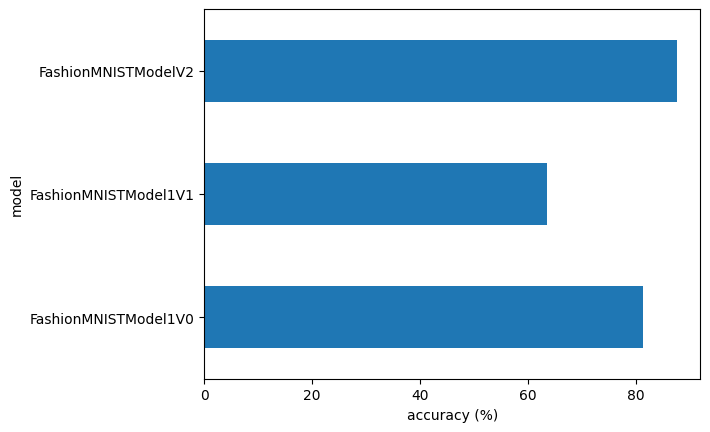

In [57]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

# Make and evaluate random predictions with the best model

In [59]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability(logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [60]:
import random

test_samples = []
test_labels =[]
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

  # View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

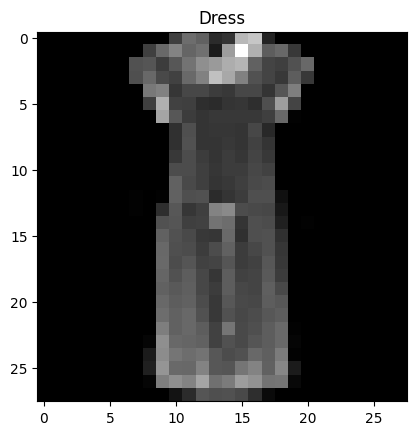

In [61]:
plt.imshow(test_samples[0].squeeze(),
           cmap="gray")
plt.title(class_names[test_labels[0]])

In [62]:
# Make predictions
pred_probs = make_predictions(model=model_C,
                              data = test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.9434e-04, 1.4358e-05, 6.5257e-06, 9.9960e-01, 9.4640e-05, 3.6796e-06,
         6.0557e-05, 2.1727e-05, 3.3270e-07, 3.5447e-06],
        [1.1335e-04, 6.3595e-06, 1.9072e-02, 1.5996e-04, 6.3850e-01, 4.4178e-07,
         3.4204e-01, 5.2073e-07, 1.0204e-04, 3.4255e-06]])

In [63]:
# Convert predictions probabilities to labels

pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels


(tensor([3, 4, 4, 7, 2, 5, 6, 2, 1]), [3, 6, 2, 7, 2, 5, 6, 2, 1])

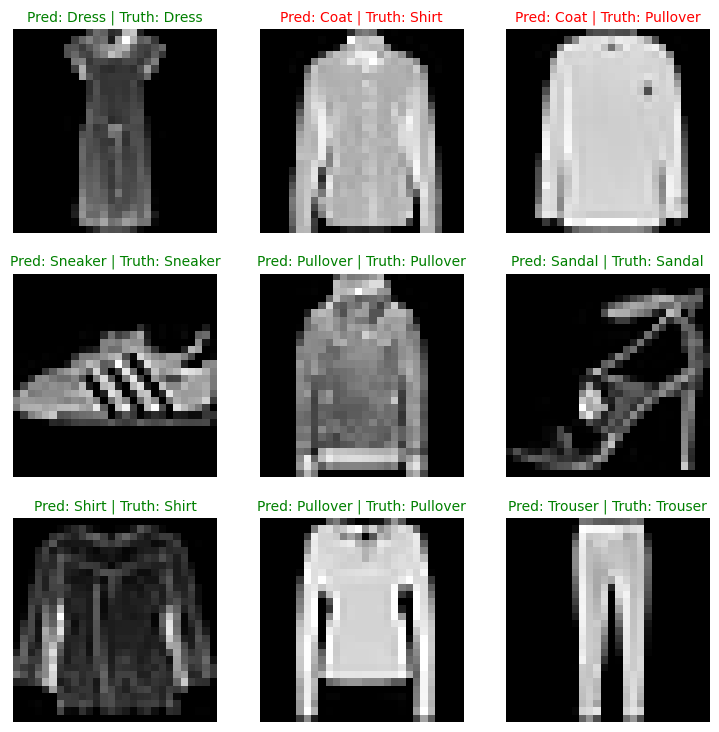

In [66]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the predicted label (in text form)
    pred_label = class_names[pred_classes[i].item()]

    # Get the true label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality and change title color accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, color="g")  # Green text if correct
    else:
        plt.title(title_text, fontsize=10, color="r")  # Red text if wrong

    plt.axis(False)


## Making a confusion matrix for further prediction evaluation

A confusuin matrix is a fantastic way of evaluating classification models visually

1. Make predictions with my trained model on the test dataset
2. Make a confusion matrix using torch metrics
3. Plot the confusion matrix using mlxtend

In [67]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_C.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_C(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [68]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 14.7 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [69]:
!pip install -q mlxtend -U
mlxtend.__version__



'0.22.0'

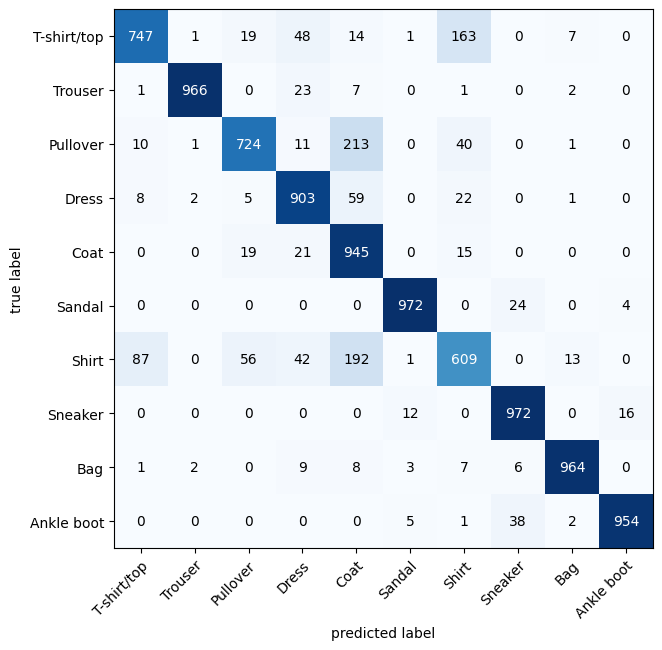

In [70]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [71]:
# Save and load best performing model
from pathlib import Path
# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save
MODEL_NAME = "My first CNN"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_C.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/My first CNN


In [76]:
# Create a new instance
torch.manual_seed(86)
loaded_model_C = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape = len(class_names))

# Load in saved stste dict
loaded_model_C.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_C.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [77]:
model_C_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34163299202919006,
 'model_acc': 87.56988817891374}

In [74]:
# Evaluate loaded model
torch.manual_seed(86)

loaded_model_C_results = eval_model(
    model=loaded_model_C,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_C_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34163299202919006,
 'model_acc': 87.56988817891374}

In [75]:
# Check if model results are close to eachother
torch.isclose(torch.tensor(model_C_results["model_loss"]),
               torch.tensor(loaded_model_C_results["model_loss"]),
               atol = 1e-02) # tolerance level

tensor(True)